# Imports

In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install optuna

In [ ]:
pip install xgboost

In [ ]:
pip install tensorflow

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import mplfinance as mpf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.dates as mdates

import optuna
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from optuna.trial import TrialState
from sklearn.metrics import accuracy_score
import math


import tensorflow as tf

from tensorflow.keras.layers import LSTM, Input

tf.random.set_seed(12)

# Read Data Set

In [ ]:
df = pd.read_csv(path + 'GOOG.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']

In [ ]:
# Convert date to datetime type
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')

<ipython-input-10-48fcdae6da87>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')


# Data Exploration


In [ ]:
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
df.shape

(4902, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4902 non-null   datetime64[ns]
 1   Open      4902 non-null   float64       
 2   High      4902 non-null   float64       
 3   Low       4902 non-null   float64       
 4   Close     4902 non-null   float64       
 5   AdjClose  4902 non-null   float64       
 6   Volume    4902 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 268.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4.902000e+03
mean,42.410002,42.859646,41.983137,42.430391,42.430391,1.178735e+08
std,39.600255,40.050607,39.203556,39.634838,39.634838,1.504320e+08
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05
25%,12.875863,13.003323,12.765465,12.893609,12.893609,2.821550e+07
50%,26.670134,26.880774,26.437625,26.666893,26.666893,5.969846e+07
75%,58.384750,58.859625,57.859186,58.400250,58.400250,1.459169e+08
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09


In [ ]:
# Check data range
earliest_date = date_time = min(df['Date'])
latest_date = date_time = max(df['Date'])
print('Date range of stock data:\t', earliest_date, '-', latest_date)

Date range of stock data:	 2004-08-20 00:00:00 - 2024-02-09 00:00:00


In [ ]:
# Check for missing values
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [ ]:
# Check for duplicates
df[['Date']].duplicated().sum()

0

# Data Visualization

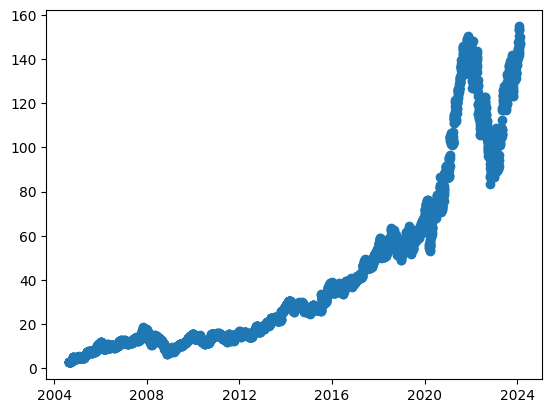

In [ ]:
# Graph close price
plt.scatter(x='Date', y='Close', data=df)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


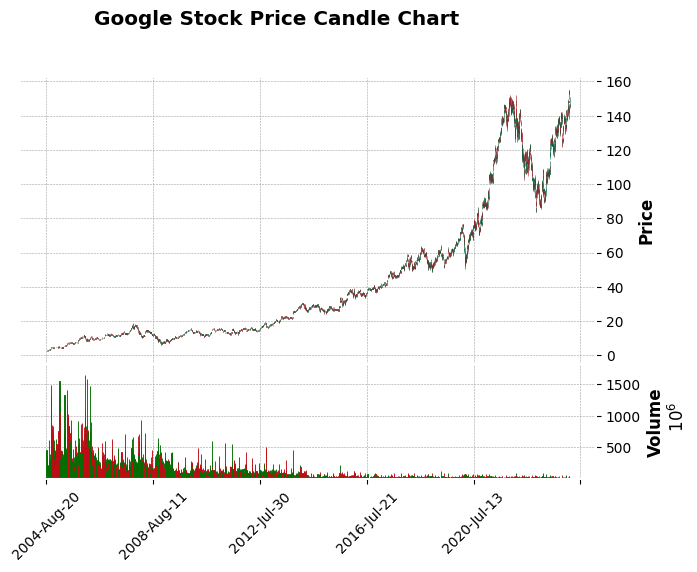

In [ ]:
# Candlestick plot
# green and red show whether price has gone down or up in a day between open and close
df_cpy = pd.read_csv(path + 'GOOG.csv')
df_cpy['Date'] = pd.to_datetime(df_cpy['Date'])
df_cpy.set_index('Date', inplace=True)

mpf.plot(df_cpy, type = "candle", volume = True, style = "charles", title = "Google Stock Price Candle Chart", ylabel = "Price", ylabel_lower = "Volume")

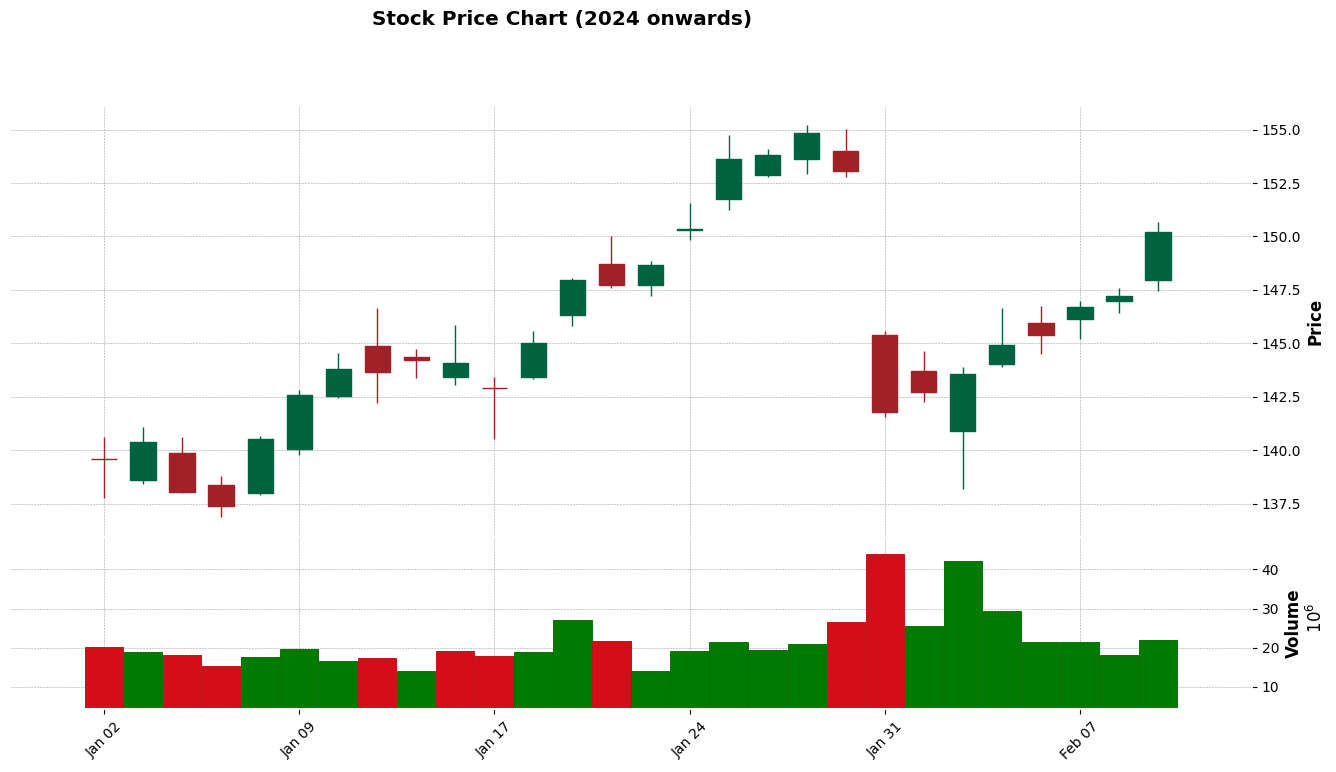

In [ ]:
#2024 candlestick
df_2024_onwards = df_cpy[df.index >= pd.to_datetime('2024-01-01')]

# Plot candlestick chart
mpf.plot(df_2024_onwards, type='candle', volume=True, style='charles', title='Stock Price Chart (2024 onwards)',
         ylabel='Price', ylabel_lower='Volume', figratio=(12, 6), figscale=1.5)

In [ ]:
# Pairplot
sns.pairplot(data=df, vars=['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume'])

In [ ]:
correlation_matrix = df_cpy.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999906  0.999899  0.999782   0.999782 -0.471797
High       0.999906  1.000000  0.999879  0.999898   0.999898 -0.470857
Low        0.999899  0.999879  1.000000  0.999906   0.999906 -0.472976
Close      0.999782  0.999898  0.999906  1.000000   1.000000 -0.472023
Adj Close  0.999782  0.999898  0.999906  1.000000   1.000000 -0.472023
Volume    -0.471797 -0.470857 -0.472976 -0.472023  -0.472023  1.000000

Summary Statistics:
              Open         High          Low        Close     AdjClose  \
count  4902.000000  4902.000000  4902.000000  4902.000000  4902.000000   
mean     42.410002    42.859646    41.983137    42.430391    42.430391   
std      39.600255    40.050607    39.203556    39.634838    39.634838   
min       2.470490     2.534002     2.464263     2.490913     2.490913   
25%      12.875863    13.003323    12.765465    12.893609    12.893609   
50%      26.670134

# Models

## Random Forest

In [ ]:
# Read in dataset
path = 'drive/MyDrive/MSCI 446 Group Project/'
df = pd.read_csv(path + 'GOOG.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']

In [ ]:
# Convert date to datetime type and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


### Visualize Data

Text(0.5, 1.0, 'Google Stock Closing Price')

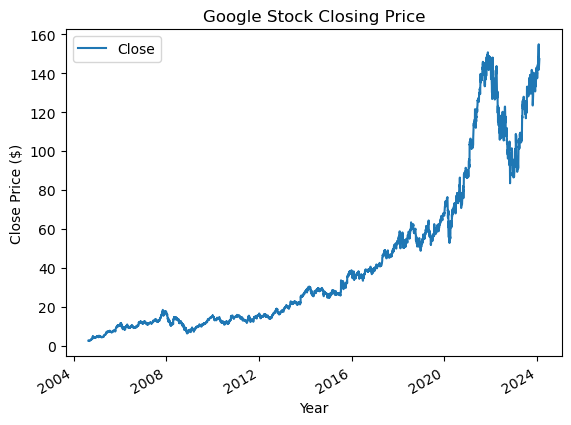

In [ ]:
# Graph tomorrow's close price
df.plot.line(y="Close")
plt.ylabel('Close Price ($)')
plt.xlabel('Year')
plt.title('Google Stock Closing Price')

### Prepare Data

In [ ]:
df.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
# Add our target variable, the next day's closing price
df["Tomorrow"] = df["Close"].shift(-1)
df.head()

,Open,High,Low,Close,AdjClose,Volume,Tomorrow
Date,,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2.724787
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.611960
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.640104
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.687676
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,2.643840


In [ ]:
# Check for missing values
df.isna().sum()

Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
Tomorrow    1
dtype: int64

In [ ]:
# Drop missing values
df.dropna(inplace=True)
df.isna().sum()

Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
Tomorrow    0
dtype: int64

In [ ]:
# Check if 'Close' and 'AdjClose' have any differing values
(df['Close'] == df['AdjClose']).value_counts()

True    4901
dtype: int64

In [ ]:
# Since 'Close' contains the same values as 'AdjClose', we drop the AdjClose column
df.drop(['AdjClose'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,2.724787
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,2.611960
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,2.640104
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2.687676
2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,2.643840


#### Scale Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

# Set our input and output columns
input_cols = ['Open', 'High', 'Low',	'Close', 'Volume']
X, y = df[input_cols], df[['Tomorrow']]

# Fit and transform the input columns
X_scaled = scaler.fit_transform(X)
df[input_cols] = X_scaled

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-20,0.000299,0.001197,0.000258,0.001357,0.277886,2.724787
2004-08-23,0.001900,0.001915,0.001674,0.001535,0.222151,2.611960
2004-08-24,0.001981,0.001609,0.000766,0.000795,0.185523,2.640104
2004-08-25,0.000948,0.001021,0.000818,0.000979,0.111765,2.687676
2004-08-26,0.000947,0.001013,0.000947,0.001292,0.086276,2.643840


#### Split Train and Test Data

In [ ]:
# Split data into df_train and df_test
split_ratio = 0.9
split_index = int(len(df) * split_ratio)
df_train, df_test = df[:split_index], df[split_index:]
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Rename df_test from 'Tomorrow' to 'Actual'
df_test = df_test.drop(input_cols, axis=1)
df_test = df_test.rename(columns={"Tomorrow": "Actual"})

df_test.head()

,Actual
Date,
2022-02-25,134.891006
2022-02-28,134.167999
2022-03-01,134.751495
2022-03-02,134.307999
2022-03-03,132.121994


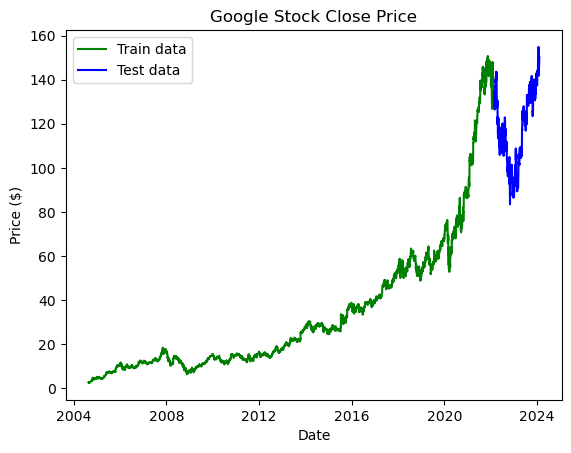

In [ ]:
# Plot train and test data
plt.plot(y_train['Tomorrow'], 'green', label='Train data')
plt.plot(y_test['Tomorrow'], 'blue', label='Test data')
plt.title('Google Stock Close Price')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()

### Train Model

#### Select Hyperparameters

Since GridSearchCV takes around 1-2h to finish, we included just the results below. To manually run the hyperparameter tuning function, refer to `Random Forest GridSearchCV.ipynb.`

In [ ]:
# from sklearn.model_selection import GridSearchCV

# grid = {
#     'n_estimators': [100, 200, 300, 400, 500, 1000, 2000],
#     'max_features': [None, 'sqrt','log2'],
#     'max_depth': [None,2,3,4,5,6],
#     'bootstrap': [True, False],
#     'random_state' : [156]
# }

# ## Run GridSearchCV function
# grid_randomforest = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
# model = grid_randomforest.fit(X_train, np.ravel(y_train))

In [ ]:
# # Output the results of GridSearchCV
# print(" Results from Grid Search " )
# print("\n The best estimator across all searched params:\n",grid_randomforest.best_estimator_)
# print("\n The best score across all searched params:\n",grid_randomforest.best_score_)
# print("\n The best parameters across all searched params:\n",grid_randomforest.best_params_)

 Results from Grid Search

 The best estimator across all searched params:
 RandomForestRegressor(max_features='sqrt', n_estimators=400, random_state=156)

 The best score across all searched params:
 0.6022196906299266

 The best parameters across all searched params:
 {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 156}

#### Fit Model

In [ ]:
# Use best parameters output by GridSearchCV
model = RandomForestRegressor(max_features='sqrt', n_estimators=400, random_state=156)

model = model.fit(X_train, np.ravel(y_train))

predicted_values = model.predict(X_test)
df_test['Predicted'] = predicted_values

df_test.head()

,Actual,Predicted
Date,,
2022-02-25,134.891006,135.433128
2022-02-28,134.167999,136.054562
2022-03-01,134.751495,136.021453
2022-03-02,134.307999,135.989155
2022-03-03,132.121994,135.380731


### Evaluate Results

In [ ]:
# Print MSE, MAE, and RMSE
mse = mean_squared_error(df_test['Actual'], df_test['Predicted'])
mae = mean_absolute_error(df_test['Actual'], df_test['Predicted'])
rmse = math.sqrt(mean_squared_error(df_test['Actual'], df_test['Predicted']))
print('MSE:\t', str(mse))
print('MAE:\t', str(mae))
print('RMSE:\t', str(rmse))

MSE:	 8.34057021815275
MAE:	 2.225937444684293
RMSE:	 2.888004539150302


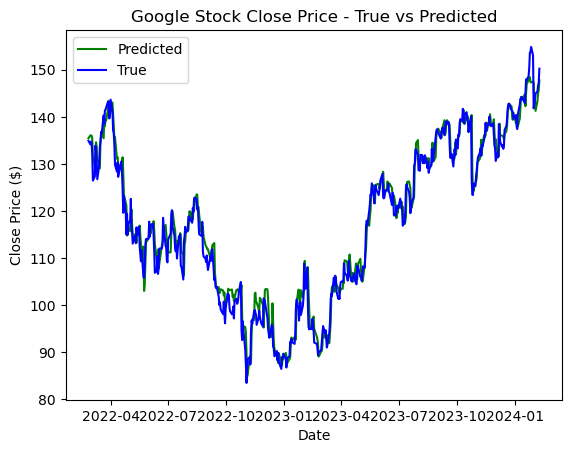

In [ ]:
# Plot predicted vs true stock price
plt.title('Google Stock Close Price - True vs Predicted')
plt.plot(df_test.index, df_test['Predicted'], color = 'green', label = 'Predicted')
plt.plot(df_test.index, df_test['Actual'], color = 'blue', label = 'True')
plt.ylabel('Close Price ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

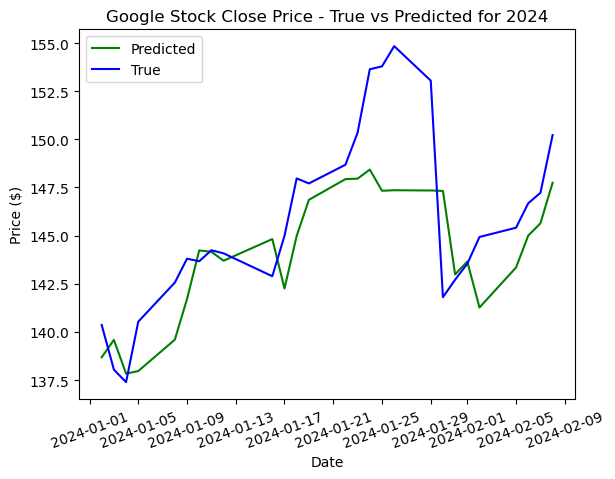

In [ ]:
# Plot results for 2024 only

df_eval_2024_onwards = df_test[df_test.index.year >= 2024]
plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_eval_2024_onwards['Predicted'], 'green', label='Predicted')
plt.plot(df_eval_2024_onwards['Actual'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend(loc='upper left')
plt.show()

## ARIMA

In [ ]:
path = 'drive/MyDrive/MSCI 446 Group Project/'
df = pd.read_csv(path + 'GOOG.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [ ]:
# Convert date to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


### Visualize Data

Text(0.5, 0, 'Date')

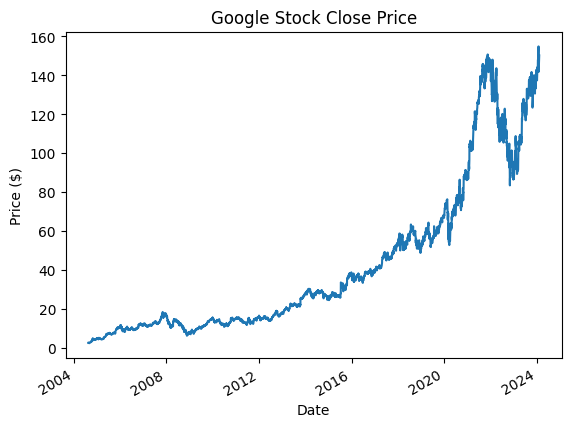

In [ ]:
# Graph close price
df.plot(y='Close', legend=False)
plt.title('Google Stock Close Price')
plt.ylabel('Price ($)')
plt.xlabel('Date')

### Prepare Data

To stabilize the variance of the data over time, we will take the log of the data.

In [ ]:
# Convert to log - Don't need to add 1 to avoid log(0) since stock prices (of interest) are positive
df['CloseLog'] = np.log(df['Close'])

Text(0.5, 0, 'Date')

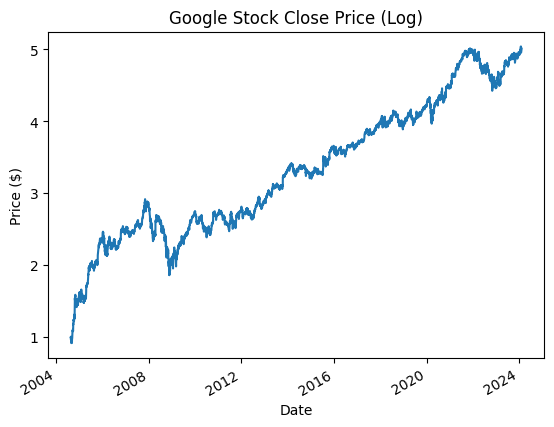

In [ ]:
# Graph close price
df.plot(y='CloseLog', legend=False)
plt.title('Google Stock Close Price (Log)')
plt.ylabel('Price ($)')
plt.xlabel('Date')

ARIMA must be used on stationary data. We will use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

Let the null hypothesis $H_0$ be that the data is non-stationary and let the alternative hypothesis $H_A$ be that the data is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['CloseLog'])

print('ADF Statistic:\t', result[0])
print('p-value:\t', result[1])
print('Critical Values:\t')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF Statistic:	 -1.8595794086590058
p-value:	 0.3513084644375408
Critical Values:	
	1%: -3.432
	5%: -2.862
	10%: -2.567


Here, $p \approx 0.351 > 0.05$, so we cannot reject the null hypothesis and the data is non-stationary.

To make the data stationary, we can take the difference of the data and recompute the p-value.

In [ ]:
df['CloseLogDiff'] = df['CloseLog'].diff()

In [ ]:
result = adfuller(df['CloseLogDiff'].dropna())
print('ADF Statistic:\t', result[0])
print('p-value:\t', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF Statistic:	 -30.231516486338336
p-value:	 0.0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Now, $p = 0 < 0.05$, so we can reject the null hypothesis and the data is stationary.

Since we differenced once, we set the ARIMA parameter $d=1$

In [ ]:
# Split data
split_ratio = 0.9
split_index = int(len(df) * split_ratio)
df_train, df_test = df[:split_index], df[split_index:]

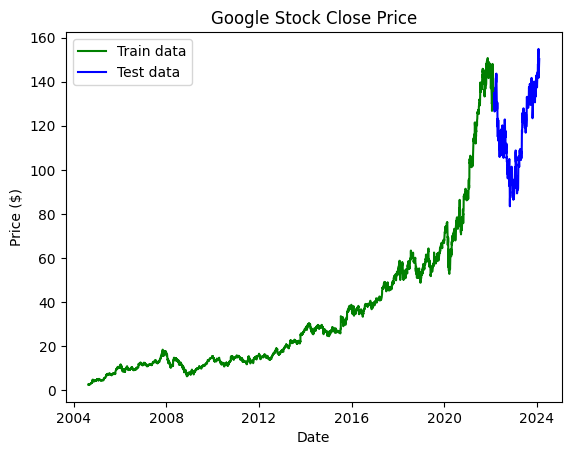

In [ ]:
# Plot train and test data
plt.plot(df_train['Close'], 'green', label='Train data')
plt.plot(df_test['Close'], 'blue', label='Test data')
plt.title('Google Stock Close Price')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()

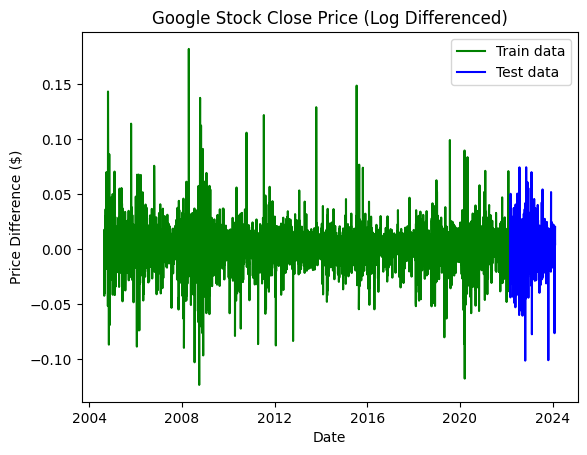

In [ ]:
# Plot train and test data
plt.plot(df_train['CloseLogDiff'], 'green', label='Train data')
plt.plot(df_test['CloseLogDiff'], 'blue', label='Test data')
plt.title('Google Stock Close Price (Log Differenced)')
plt.ylabel('Price Difference ($)')
plt.xlabel('Date')
plt.legend()

As we can see in the graph above, the data has no clear trend and oscillates around 0 (stationary). It has approximately constant variance.

The PACF graph also demonstrates that the data is stationary since we have a spike at lag-1.

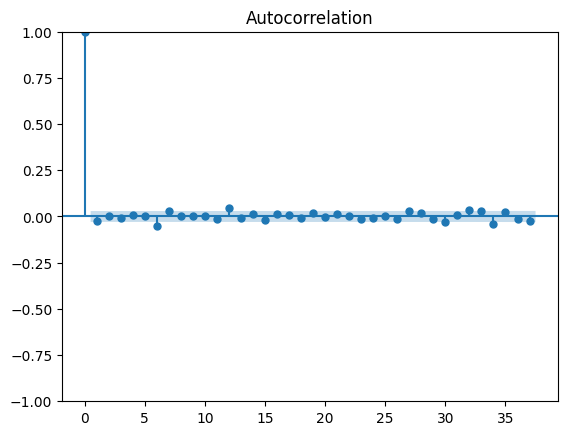

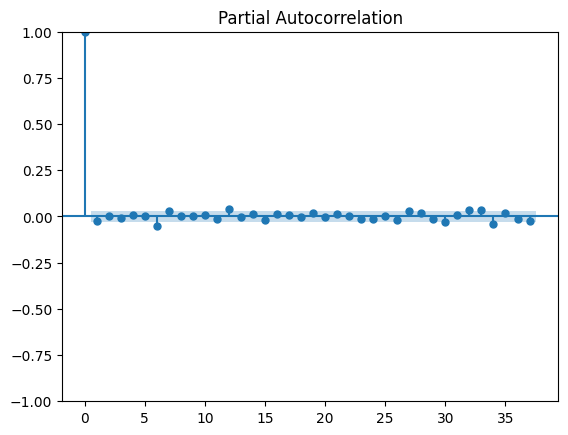

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_train['CloseLogDiff'].dropna())
pacf = plot_pacf(df_train['CloseLogDiff'].dropna())

Using the plot again, since the PACF plot has a spike at lag-1 but not beyond, the ACF

### Train Model

#### Select Hyperparameters

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima
import math

In [ ]:
model_autoARIMA = auto_arima(
    df_train['CloseLog'],
    seasonal=True,
    trace=True,
    d=1
)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-22468.221, Time=5.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22473.919, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22474.146, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22474.125, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22466.250, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-22472.229, Time=3.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-22472.324, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-22470.207, Time=4.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-22466.058, Time=0.57 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 21.907 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4411
Model:               SARIMAX(1, 1, 0)   Log Likelihood               11240.073
Date:                Tue, 26 M

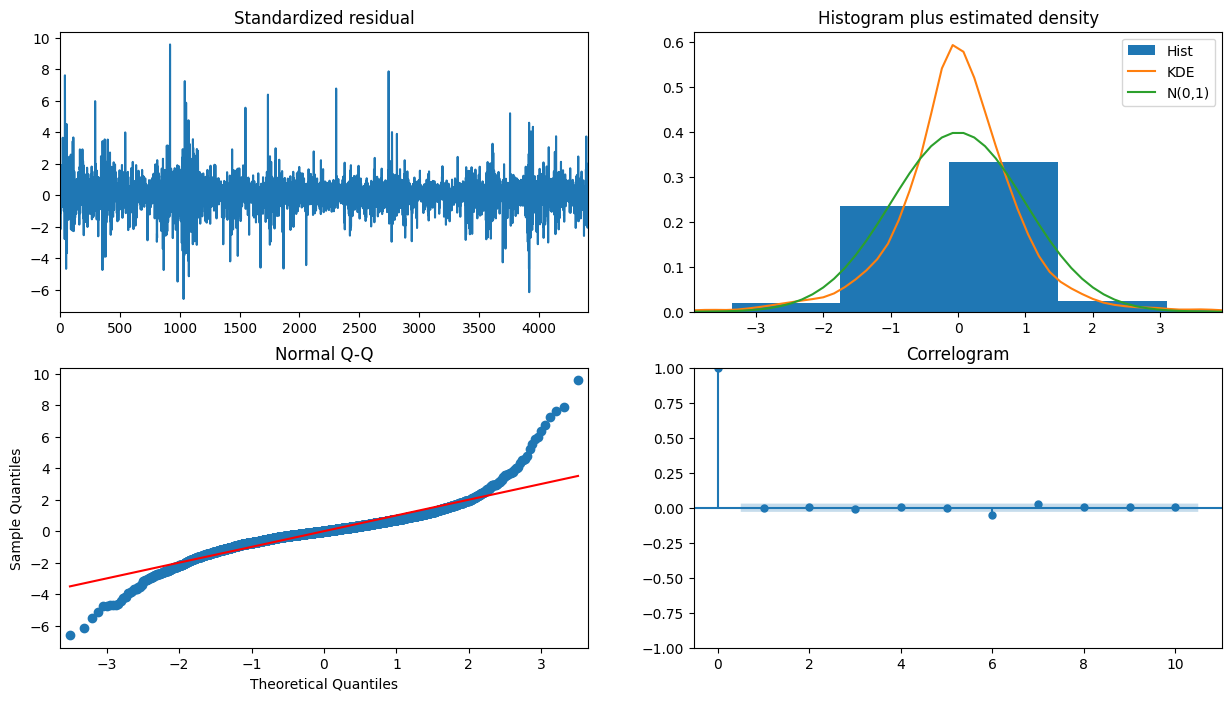

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
best_p, best_d, best_q = model_autoARIMA.order
print("Best (p, d, q) found:", (best_p, best_d, best_q))

Best (p, d, q) found: (1, 1, 0)


#### Fit Model

In [ ]:
history = list(df_train['CloseLog'])
yhats = []

# Initialize and fit ARMIA model
for t in range(len(df_test)):
    # Fit model and predict
    model = ARIMA(history, order=(best_p, best_d, best_q))
    model_fit = model.fit()

    yhat = model_fit.forecast(steps=1)[0]
    yhats.append(yhat)

    # Add predictions and history
    true_test = df_test['CloseLog'].values[t]
    history.append(true_test)

### Evaluate Results

In [ ]:
df_predictions = pd.DataFrame(yhats, columns=['PredictionLog'])
df_predictions.index = df_test.index
df_predictions.head()

,PredictionLog
Date,
2022-02-28,4.901429
2022-03-01,4.904411
2022-03-02,4.899201
2022-03-03,4.903344
2022-03-04,4.900202


In [ ]:
sum(df_predictions['PredictionLog'].isna())

0

In [ ]:
# Reverse the logarithmic scaling
def reverse_log_scaling(predictions):
    return np.exp(predictions)

In [ ]:
df_predictions['Prediction'] = reverse_log_scaling(df_predictions['PredictionLog'])
df_predictions.head()

,PredictionLog,Prediction
Date,,
2022-02-28,4.901429,134.481875
2022-03-01,4.904411,134.883485
2022-03-02,4.899201,134.182585
2022-03-03,4.903344,134.739659
2022-03-04,4.900202,134.316966


In [ ]:
df_test[['CloseLog', 'Close']].head()

,CloseLog,Close
Date,,
2022-02-28,4.904467,134.891006
2022-03-01,4.899093,134.167999
2022-03-02,4.903432,134.751495
2022-03-03,4.900136,134.307999
2022-03-04,4.883726,132.121994


In [ ]:
# Check for null entries
sum(df_test['Close'].isna()), sum(df_predictions['Prediction'].isna())

(0, 0)

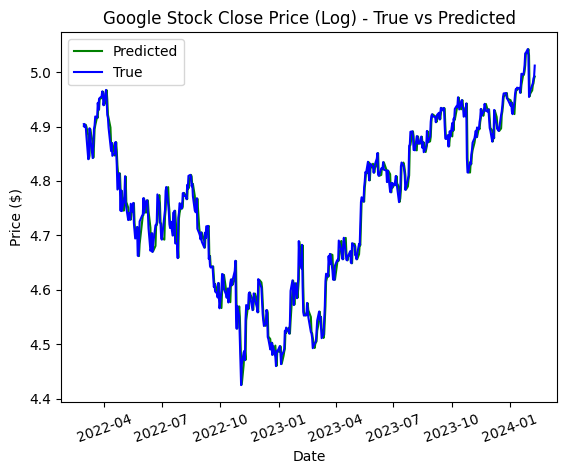

In [ ]:
# Plot predicted vs true stock price (Log)
plt.title('Google Stock Close Price (Log) - True vs Predicted')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_predictions['PredictionLog'], 'green', label='Predicted')
plt.plot(df_test['CloseLog'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()

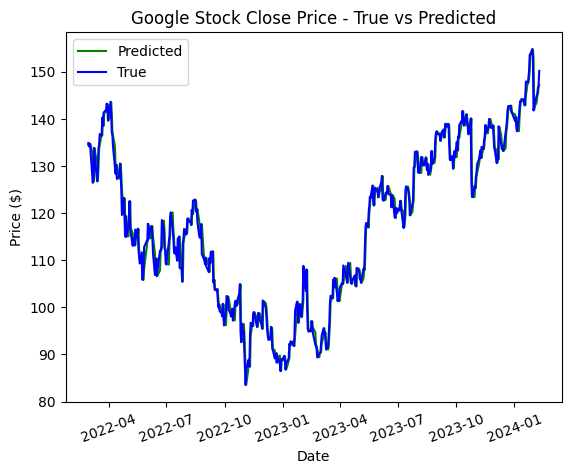

In [ ]:
# Plot predicted vs true stock price
plt.title('Google Stock Close Price - True vs Predicted')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_predictions['Prediction'], 'green', label='Predicted')
plt.plot(df_test['Close'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()

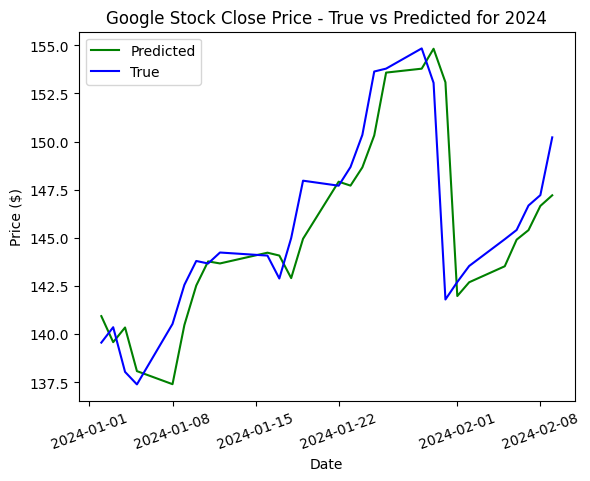

In [ ]:
plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_predictions[df_predictions.index.year >= 2024]['Prediction'], 'green', label='Predicted')
plt.plot(df[df.index.year >= 2024]['Close'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend(loc='upper left')
plt.show()

As seen in the plot above, although the predictions give a somewhat low MSE, the predictions are just the true data offset by a day. Thus, this ARIMA model doesn't offer much insight into actual predictions.

In [ ]:
mse = mean_squared_error(df_test['Close'], df_predictions['Prediction'])
mae = mean_absolute_error(df_test['Close'], df_predictions['Prediction'])
rmse = math.sqrt(mean_squared_error(df_test['Close'], df_predictions['Prediction']))
print('MSE:\t', str(mse))
print('MAE:\t', str(mae))
print('RMSE:\t', str(rmse))

MSE:	 6.190329609862907
MAE:	 1.8435702852344389
RMSE:	 2.488037300737854


In [ ]:
mse = mean_squared_error(df_test['CloseLog'], df_predictions['PredictionLog'])
mae = mean_absolute_error(df_test['CloseLog'], df_predictions['PredictionLog'])
rmse = math.sqrt(mean_squared_error(df_test['CloseLog'], df_predictions['PredictionLog']))
print('MSE:\t', str(mse))
print('MAE:\t', str(mae))
print('RMSE:\t', str(rmse))

MSE:	 0.0004745004417516343
MAE:	 0.016060936462259437
RMSE:	 0.021783031050605292


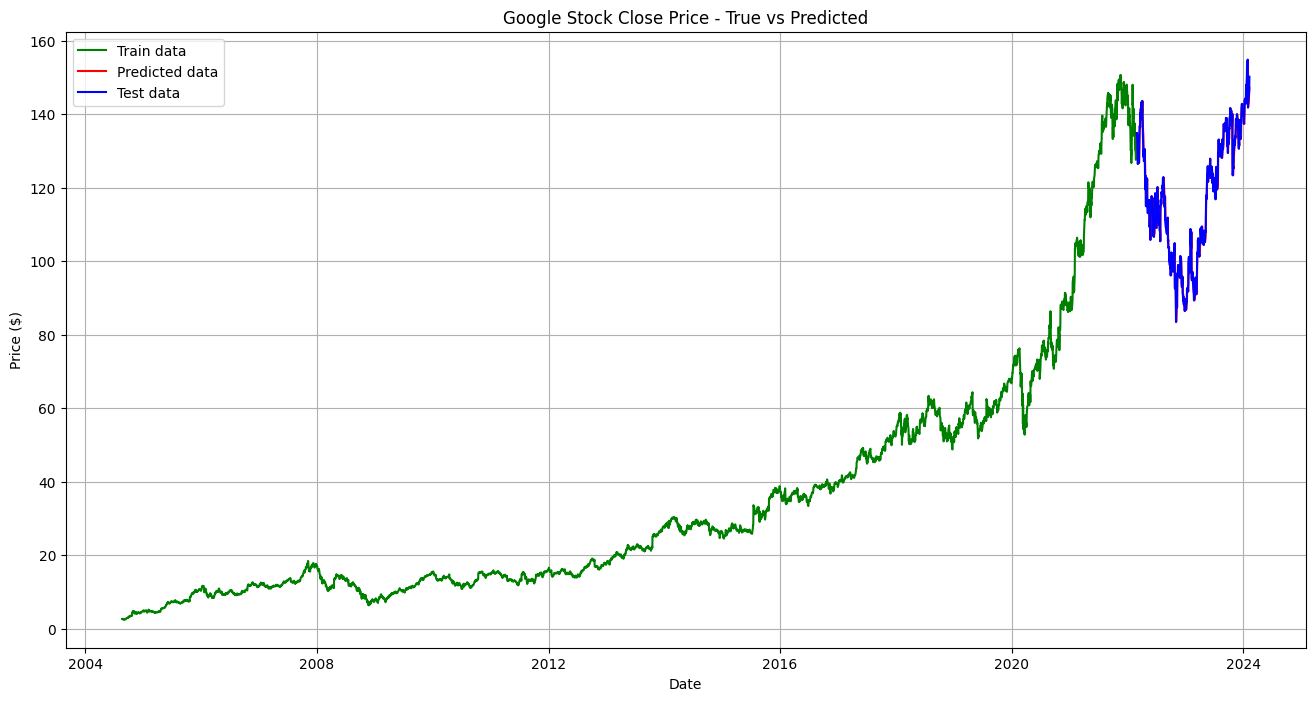

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Google Stock Close Price - True vs Predicted')
plt.plot(df_train.index, df_train['Close'], color='green', label = 'Train')
plt.plot(df_test.index, df_predictions['Prediction'], color = 'red', label = 'Predicted')
plt.plot(df_test.index, df_test['Close'], color = 'blue', label = 'Test')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

#### Read dataset

In [ ]:
df_xgboost = pd.read_csv("GOOG.csv")

In [ ]:
df_xgboost.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


#### Prepare Data

In [ ]:
#calculate return from one day ago
df_xgboost["Return"] = df_xgboost["Close"]/df_xgboost["Close"].shift(1) -1

In [ ]:
df_xgboost.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,0.018019


In [ ]:
#Convert year, month, day into numerical values
df_xgboost["Date"] = pd.to_datetime(df_xgboost["Date"])

df_xgboost["Year"] = df_xgboost["Date"].dt.year
df_xgboost["Month"] = df_xgboost["Date"].dt.month
df_xgboost["Day"] = df_xgboost["Date"].dt.day




In [ ]:
#engineer features to be one day behind
df_xgboost["Prev Adj Close"] = df_xgboost["Adj Close"].shift(1)
df_xgboost["Prev Close"] = df_xgboost["Close"].shift(1)
df_xgboost['Prev Volume'] = df_xgboost['Volume'].shift(1)
df_xgboost['Prev Open'] = df_xgboost['Open'].shift(1)
df_xgboost['Prev Volume'] = df_xgboost['Prev Volume'].apply(lambda x: 0 if x == 0 else np.log(x))

#standardize adj close, close, and open
scaler = StandardScaler()
df_xgboost[['Prev Adj Close', 'Prev Close', 'Prev Open']] = scaler.fit_transform(df_xgboost[['Prev Adj Close', 'Prev Close', 'Prev Open']])

# scaler = StandardScaler()
# df[['Prev Close', 'Prev Volume']] = scaler.fit_transform(df[['Prev Close', 'Prev Volume']])

#find the rolling averages 1 day behind for close
df_xgboost['5d Close Rolling Mean'] = df_xgboost['Close'].rolling(window=5).mean().shift(1)
df_xgboost['5d Close Rolling Std'] = df_xgboost['Close'].rolling(window=5).std().shift(1)
df_xgboost['10d Close Rolling Mean'] = df_xgboost['Close'].rolling(window=10).mean().shift(1)
df_xgboost['10d Close Rolling Std'] = df_xgboost['Close'].rolling(window=10).std().shift(1)

#list of features
features = [
    "Year", "Month", "Day",
    "Prev Adj Close", "Prev Volume",
    "5d Close Rolling Mean", "5d Close Rolling Std",
    "10d Close Rolling Mean", "10d Close Rolling Std",
    "Prev Open", "Prev Close", "Return"
]

#find 90 % split index
split = df_xgboost["Date"].iloc[int(df_xgboost["Date"].shape[0] * 0.9)]

#get train and test sets
train = df_xgboost[df_xgboost["Date"] < split]
test = df_xgboost[df_xgboost["Date"] >= split]

label = ["Close"]
x_train = train[features]
y_train = train[label]

x_val = test[features]
y_val = test[label]

In [ ]:
df_xgboost.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Year,Month,Day,Prev Adj Close,Prev Close,Prev Volume,Prev Open,5d Close Rolling Mean,5d Close Rolling Std,10d Close Rolling Mean,10d Close Rolling Std
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN,2004,8,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064,2004,8,23,-1.002672,-1.002672,19.944250,-1.007609,NaN,NaN,NaN,NaN
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408,2004,8,24,-1.001987,-1.001987,19.720485,-1.001479,NaN,NaN,NaN,NaN
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775,2004,8,25,-1.004836,-1.004836,19.540389,-1.001170,NaN,NaN,NaN,NaN
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,0.018019,2004,8,26,-1.004125,-1.004125,19.033948,-1.005123,NaN,NaN,NaN,NaN


#### Tune hyperparameters
The code for tuning hyperparameters is commented out because it takes too long too run, feel free to uncomment and rerun.

In [ ]:
# #use optuna to tune hyperparameters

# def objective(trial):

#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 20),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
#     }


#     model = xgb.XGBRegressor(**params)

#     model.fit(x_train, y_train)

#     preds = model.predict(x_val)
#     rmse = mean_squared_error(y_val, preds, squared=False)

#     return rmse

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# print('Best trial:', study.best_trial.params)

#### Fit and Train Model

In [ ]:
#define model
model = xgb.XGBRegressor(
    n_estimators = 588,
    max_depth = 3,
    learning_rate = 0.01889482519542899,
    subsample = 0.5965910344366774,
    colsample_bytree = 0.6407035546016049,
    min_child_weight = 5
)

In [ ]:
#fit model to the x_train and y_train
model.fit(
    x_train,
    y_train,
    eval_set = [(x_train, y_train), (x_val, y_val)],
    early_stopping_rounds = 20,
    verbose = False
)


/Users/edwardsong/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6407035546016049, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01889482519542899, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=588, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

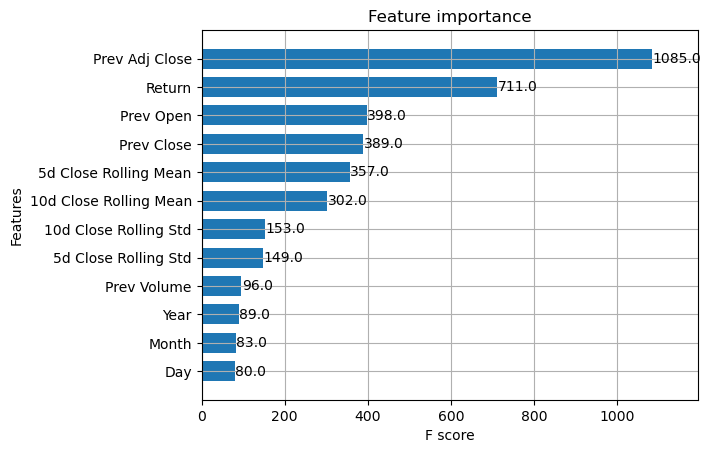

In [ ]:
#create a new df to analyze
df_eval = x_val.copy()
df_eval["Date"] = pd.to_datetime(df_eval[["Year", "Month", "Day"]])
df_eval.drop(["Year", "Month", "Day"], inplace = True, axis = 1)

df_eval.head()

,Prev Adj Close,Prev Volume,5d Close Rolling Mean,5d Close Rolling Std,10d Close Rolling Mean,10d Close Rolling Std,Prev Open,Prev Close,Return,Date
4411,2.325749,17.082643,130.929597,2.723072,133.029951,3.162299,2.303095,2.325749,0.002762,2022-02-28
4412,2.335130,17.205849,131.814299,3.210383,133.106051,3.200637,2.297005,2.335130,-0.005360,2022-03-01
4413,2.316874,17.019882,132.767399,3.016925,132.992850,3.133739,2.327216,2.316874,0.004349,2022-03-02
4414,2.331607,16.992147,134.200699,0.896516,132.825449,2.970454,2.330457,2.331607,-0.003291,2022-03-03
4415,2.320409,16.800182,134.527600,0.299915,132.507499,2.557443,2.365084,2.320409,-0.016276,2022-03-04


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

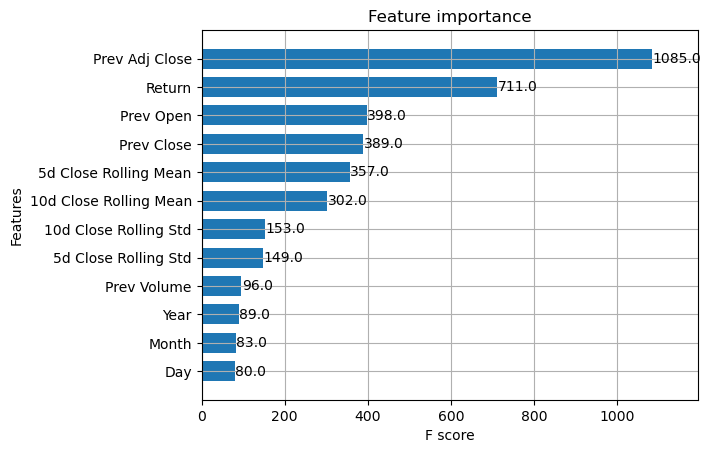

In [ ]:
xgb.plot_importance(model, height = 0.7)

#### Predict and visualize results

In [ ]:
#predict the test set
df_eval["ClosePredictions"] = model.predict(x_val)


In [ ]:
df_eval.head()

,Prev Adj Close,Prev Volume,5d Close Rolling Mean,5d Close Rolling Std,10d Close Rolling Mean,10d Close Rolling Std,Prev Open,Prev Close,Return,Date,ClosePredictions
4411,2.325749,17.082643,130.929597,2.723072,133.029951,3.162299,2.303095,2.325749,0.002762,2022-02-28,134.840637
4412,2.335130,17.205849,131.814299,3.210383,133.106051,3.200637,2.297005,2.335130,-0.005360,2022-03-01,133.772583
4413,2.316874,17.019882,132.767399,3.016925,132.992850,3.133739,2.327216,2.316874,0.004349,2022-03-02,135.820236
4414,2.331607,16.992147,134.200699,0.896516,132.825449,2.970454,2.330457,2.331607,-0.003291,2022-03-03,134.928314
4415,2.320409,16.800182,134.527600,0.299915,132.507499,2.557443,2.365084,2.320409,-0.016276,2022-03-04,133.296417


In [ ]:
y_val.head()

,Close
4411,134.891006
4412,134.167999
4413,134.751495
4414,134.307999
4415,132.121994


In [ ]:
#combine prediction with the expected results

df_eval = pd.concat([df_eval, y_val], axis = 1)


df_eval.head()

,Prev Adj Close,Prev Volume,5d Close Rolling Mean,5d Close Rolling Std,10d Close Rolling Mean,10d Close Rolling Std,Prev Open,Prev Close,Return,Date,ClosePredictions,Close
4411,2.325749,17.082643,130.929597,2.723072,133.029951,3.162299,2.303095,2.325749,0.002762,2022-02-28,134.840637,134.891006
4412,2.335130,17.205849,131.814299,3.210383,133.106051,3.200637,2.297005,2.335130,-0.005360,2022-03-01,133.772583,134.167999
4413,2.316874,17.019882,132.767399,3.016925,132.992850,3.133739,2.327216,2.316874,0.004349,2022-03-02,135.820236,134.751495
4414,2.331607,16.992147,134.200699,0.896516,132.825449,2.970454,2.330457,2.331607,-0.003291,2022-03-03,134.928314,134.307999
4415,2.320409,16.800182,134.527600,0.299915,132.507499,2.557443,2.365084,2.320409,-0.016276,2022-03-04,133.296417,132.121994


In [ ]:
mse = mean_squared_error(
    y_true = df_eval["ClosePredictions"],
    y_pred = df_eval["Close"]
)

mae = mean_absolute_error(
    y_true = df_eval["ClosePredictions"],
    y_pred = df_eval["Close"]
)

rmse = np.sqrt(mse)

print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RSME:{rmse}")

MSE:3.2814182464488257
MAE:1.3616586910382993
RSME:1.811468533110312


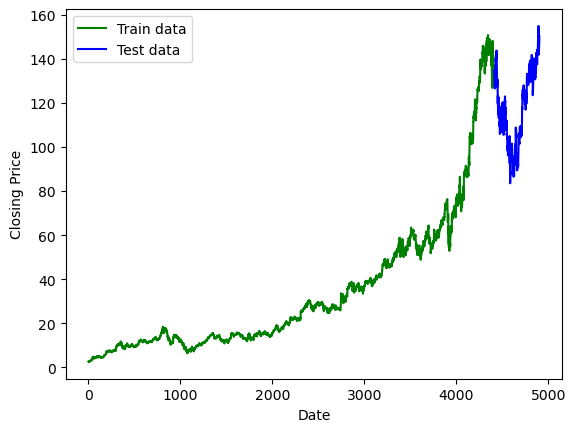

In [ ]:
#plot train and test data

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train['Close'], 'green', label='Train data')
plt.plot(test['Close'], 'blue', label='Test data')
plt.legend()

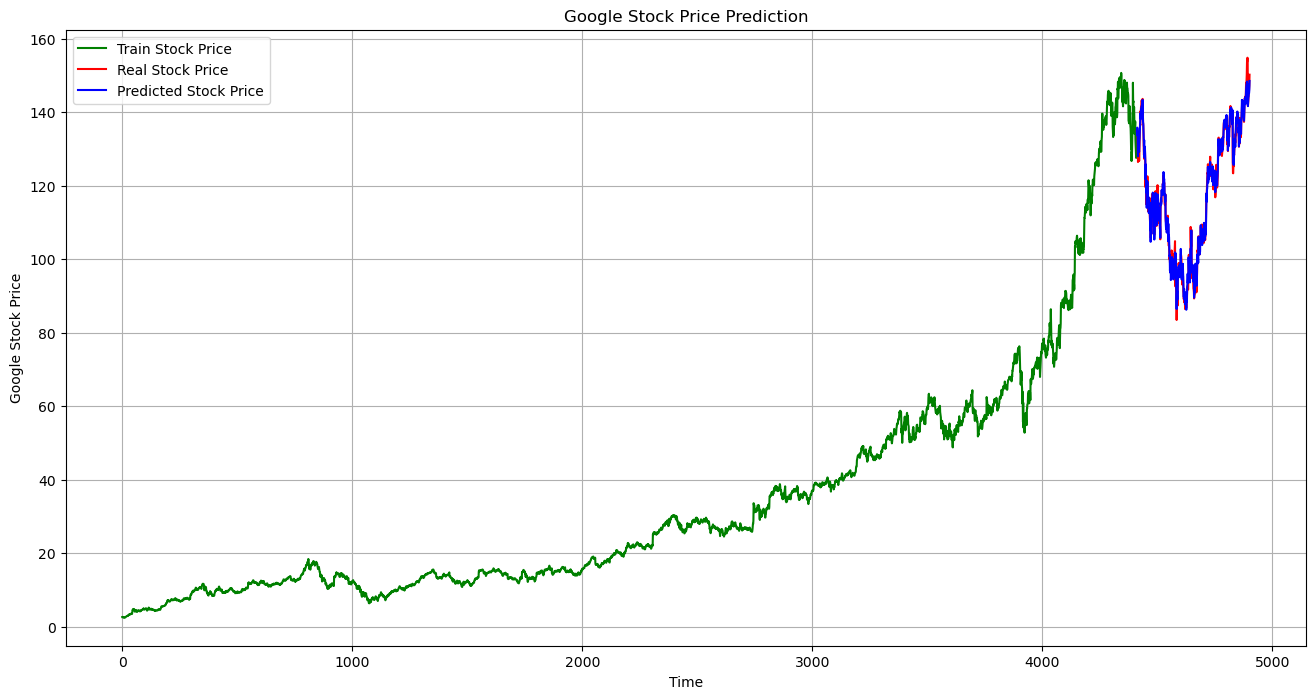

In [ ]:
#plot train, real, and predicted price

plt.figure(figsize=(16,8))
plt.plot(train.index, train['Close'], color='green', label = 'Train Stock Price')
plt.plot(test.index, test['Close'], color = 'red', label = 'Real Stock Price')
plt.plot(test.index, df_eval['ClosePredictions'], color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid(True)

plt.show()

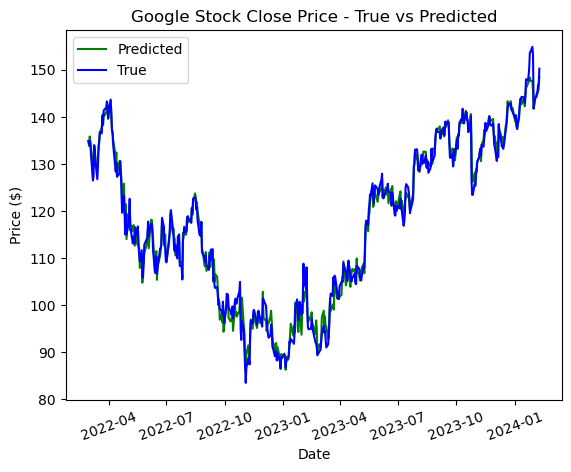

In [ ]:
#plot predicted against true

df_eval['Date'] = pd.to_datetime(df_xgboost['Date'])
df_eval.set_index('Date', inplace=True)

plt.title('Google Stock Close Price - True vs Predicted')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_eval['ClosePredictions'], 'green', label='Predicted')
plt.plot(df_eval['Close'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()

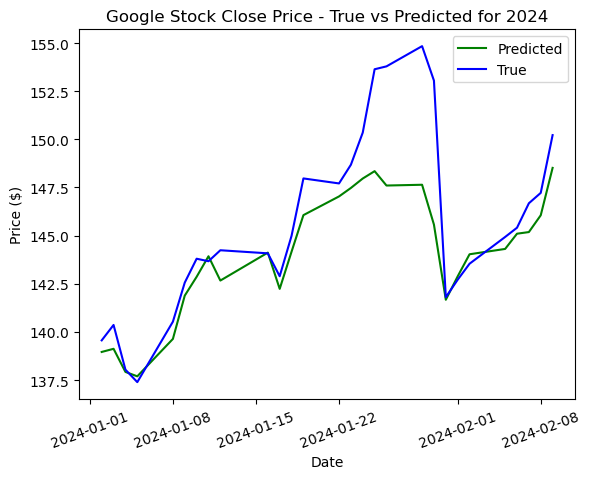

In [ ]:
#Plot predicted against true for 2024
df_eval['Date'] = pd.to_datetime(df_xgboost['Date'])
df_eval_2024_onwards = df_eval[df_eval.index.year >= 2024]

plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_eval_2024_onwards['ClosePredictions'], 'green', label='Predicted')
plt.plot(df_eval_2024_onwards['Close'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()
plt.show()

## RNN

#### Hyper parameter tuning for RNN
Commented out since it will take a while, the best hyperparameters are used in the model below.

In [ ]:
# # read in the csv
# df = pd.read_csv('GOOG.csv')

In [ ]:
# # converting the 'Date' column to datetime format and setting it as the index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

In [ ]:
# # splitting the closing price data into test and train
# split_ratio = 0.9
# split_index = int(len(df) * split_ratio)
# train = df[:split_index]
# test = df[split_index:]

# train = train["Close"].values
# test = test["Close"].values

In [ ]:
# # scaling the test and train data based off the train data
# sc = MinMaxScaler(feature_range=(0, 1))
# train = np.reshape(train, (-1,1))
# test = np.reshape(test, (-1,1))

# sc.fit(train)
# train = sc.transform(train)
# test = sc.transform(test)


In [ ]:
# # transform our data into X, y pairs, using 60 consecutive days of closing values, to predict the closing value of the next day
# def prepare_data(t):
#     X = []
#     y = []

#     time_step = 60

#     for i in range(time_step, t.shape[0]):
#         X.append(t[i-time_step:i,0])
#         y.append(t[i,0])

#     X, y = np.array(X), np.array(y)

#     X = X.reshape(X.shape[0],X.shape[1],1)
#     y = y.reshape(y.shape[0],1)
#     return (X, y)

In [ ]:
# # using optuna to tune hyperparameters
# # objective function tunes hyperparameters such as optimizer, number of epochs, batch size, and activation function for a SimpleRNN model
# # trained on prepared data and evaluates its performance using mean squared error between predicted and actual values
# def objective(trial):
#     optimizer_name = trial.suggest_categorical("optimizer", ["adam", "SGD", "RMSprop"])
#     epochs = trial.suggest_int("epochs", 30, 50,step=5, log=False)
#     batchsize = trial.suggest_int("batchsize", 32, 40,step=8, log=False)
#     activiation_name = trial.suggest_categorical("activation", ["tanh", "relu", "sigmoid"])

#     X_train, y_train = prepare_data(train)
#     X_test, y_test = prepare_data(test)

#     model = Sequential()
#     model.add(SimpleRNN(units=128, activation=activiation_name, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#     model.add(Dropout(0.2))
#     model.add(SimpleRNN(units=64, activation=activiation_name))
#     model.add(Dropout(0.2))
#     model.add(Dense(units=1))
#     model.compile(optimizer=optimizer_name, loss="mse")

#     history = model.fit(X_train, y_train, epochs = epochs, batch_size = batchsize)

#     y_predicted = model.predict(X_test)
#     y_predicted = sc.inverse_transform(y_predicted)
#     y_test = sc.inverse_transform(y_test)

#     return mean_squared_error(y_test, y_predicted)

In [ ]:
# # Optuna study that optimizes the hyperparameters of the objective function through 20 trials
# study = optuna.create_study()
# study.optimize(objective, n_trials=20)

[I 2024-03-24 14:13:05,337] A new study created in memory with name: no-name-b59d3438-c06c-4279-99c7-4229d8be5fda


Epoch 1/50


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1682
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1020
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0785
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0706
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0632
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0567
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0547
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0547
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0502
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0476
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0492
Epoch 13/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0496
Epoch 14/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0503
Epoch 15/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step 

[I 2024-03-24 14:14:39,232] Trial 0 finished with value: 576.9439005875292 and parameters: {'optimizer': 'SGD', 'epochs': 50, 'batchsize': 32, 'activation': 'sigmoid'}. Best is trial 0 with value: 576.9439005875292.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0113
Epoch 2/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0025
Epoch 3/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0018
Epoch 4/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0016
Epoch 5/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0013
Epoch 6/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014
Epoch 7/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012
Epoch 8/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0010
Epoch 9/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012
Epoch 10/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.8381e-04
Epoch 11/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0010
Epoch 12/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012
Epoch 13/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.2900e-04
Epoch 14/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010
Epoch 15/35
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14

[I 2024-03-24 14:15:45,240] Trial 1 finished with value: 13.146540368686807 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 32, 'activation': 'relu'}. Best is trial 1 with value: 13.146540368686807.


Epoch 1/30


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3209
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0328
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0194
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0131
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0096
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0085
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0069
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0061
Epoch 9/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0051
Epoch 10/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0048
Epoch 11/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0043
Epoch 12/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0040
Epoch 13/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0039
Epoch 14/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035
Epoch 15/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step 

[I 2024-03-24 14:16:39,184] Trial 2 finished with value: 31.82331170502225 and parameters: {'optimizer': 'SGD', 'epochs': 30, 'batchsize': 32, 'activation': 'tanh'}. Best is trial 1 with value: 13.146540368686807.


Epoch 1/30


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0188
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0014
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0013
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 9/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.6945e-04
Epoch 10/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010
Epoch 11/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.9633e-04
Epoch 12/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.4833e-04
Epoch 13/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.6127e-04
Epoch 14/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 9.1117e-04
Epoch 15/30
136/136 ━━━━━━━━━━━━━━

[I 2024-03-24 14:17:35,963] Trial 3 finished with value: 8.223971762871855 and parameters: {'optimizer': 'adam', 'epochs': 30, 'batchsize': 32, 'activation': 'relu'}. Best is trial 3 with value: 8.223971762871855.


Epoch 1/50


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3136
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0535
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0456
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0412
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0339
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0188
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0089
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0063
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055
Epoch 13/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042
Epoch 14/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040
Epoch 15/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step 

[I 2024-03-24 14:18:59,554] Trial 4 finished with value: 49.11665377980801 and parameters: {'optimizer': 'RMSprop', 'epochs': 50, 'batchsize': 40, 'activation': 'sigmoid'}. Best is trial 3 with value: 8.223971762871855.


Epoch 1/40


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0140
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0019
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0017
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0016
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 9/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.5644e-04
Epoch 10/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0010
Epoch 11/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012
Epoch 12/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.5411e-04
Epoch 13/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.7442e-04
Epoch 14/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 15/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2

[I 2024-03-24 14:20:14,495] Trial 5 finished with value: 25.334802996475528 and parameters: {'optimizer': 'RMSprop', 'epochs': 40, 'batchsize': 32, 'activation': 'relu'}. Best is trial 3 with value: 8.223971762871855.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1598
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0031
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.4842e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.1930e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.9944e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.0334e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.0592e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.9353e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.8907e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.7073e-04
Epoch 15/35
109/109 ━━

[I 2024-03-24 14:21:12,679] Trial 6 finished with value: 6.855864175039767 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/45


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1315
Epoch 2/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0039
Epoch 3/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0018
Epoch 4/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014
Epoch 5/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013
Epoch 6/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010
Epoch 7/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.0844e-04
Epoch 8/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.3997e-04
Epoch 9/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.8649e-04
Epoch 10/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.9241e-04
Epoch 11/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.9432e-04
Epoch 12/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.6246e-04
Epoch 13/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.0105e-04
Epoch 14/45
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.2306e-04
Epoch 15/45
136/136 ━━

[I 2024-03-24 14:22:36,713] Trial 7 finished with value: 8.883765790121009 and parameters: {'optimizer': 'RMSprop', 'epochs': 45, 'batchsize': 32, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/40


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1625
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0014
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.9319e-04
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.6474e-04
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.3972e-04
Epoch 9/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.7302e-04
Epoch 10/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.4987e-04
Epoch 11/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.3779e-04
Epoch 12/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.2647e-04
Epoch 13/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.2080e-04
Epoch 14/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.3353e-04
Epoch 15/40
136/13

[I 2024-03-24 14:23:51,639] Trial 8 finished with value: 7.65380596070109 and parameters: {'optimizer': 'RMSprop', 'epochs': 40, 'batchsize': 32, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/50


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1628
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0209
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0124
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0089
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0069
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0059
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0051
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0048
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0042
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0042
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0039
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0037
Epoch 13/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031
Epoch 14/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031
Epoch 15/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step 

[I 2024-03-24 14:25:25,895] Trial 9 finished with value: 22.457567836977425 and parameters: {'optimizer': 'SGD', 'epochs': 50, 'batchsize': 32, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0357
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0033
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0016
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0016
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0012
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.1245e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.8381e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.2794e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.5529e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.6606e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.3665e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.3606e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.4364e-04
Epoch 15/35
109/109 ━━

[I 2024-03-24 14:26:26,944] Trial 10 finished with value: 10.354937489727416 and parameters: {'optimizer': 'adam', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/40


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3543
Epoch 2/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065
Epoch 3/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021
Epoch 4/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0017
Epoch 5/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0012
Epoch 6/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.2851e-04
Epoch 7/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.6419e-04
Epoch 8/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.4033e-04
Epoch 9/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.1987e-04
Epoch 10/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.5170e-04
Epoch 11/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.9675e-04
Epoch 12/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.7522e-04
Epoch 13/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.1492e-04
Epoch 14/40
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.0405e-04
Epoch 15/40
109/10

[I 2024-03-24 14:27:38,259] Trial 11 finished with value: 7.754394991905356 and parameters: {'optimizer': 'RMSprop', 'epochs': 40, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 6 with value: 6.855864175039767.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1783
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0014
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.8169e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.7602e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.1771e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.8397e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.1349e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.3684e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.6675e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.4274e-04
Epoch 15/35
109/109 ━━

[I 2024-03-24 14:28:36,486] Trial 12 finished with value: 6.7788018397401935 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4418
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0116
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0018
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0014
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.8773e-04
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.1530e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.5729e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.5894e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.6581e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.0444e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.5701e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.9732e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.4190e-04
Epoch 15/35
109/10

[I 2024-03-24 14:29:34,479] Trial 13 finished with value: 9.036595574833665 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3678
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0086
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0024
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0015
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.4501e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0011
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.3047e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.0208e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.8596e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.7104e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.8856e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.1381e-04
Epoch 15/35
109/109 ━━━━━━

[I 2024-03-24 14:30:34,538] Trial 14 finished with value: 13.669603858287658 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/30


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1501
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0610
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0467
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0408
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0068
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0061
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0045
Epoch 9/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0044
Epoch 10/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0036
Epoch 11/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0037
Epoch 12/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031
Epoch 13/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0025
Epoch 14/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0027
Epoch 15/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step 

[I 2024-03-24 14:31:28,410] Trial 15 finished with value: 17.872440657218878 and parameters: {'optimizer': 'adam', 'epochs': 30, 'batchsize': 40, 'activation': 'sigmoid'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/45


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1531
Epoch 2/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058
Epoch 3/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023
Epoch 4/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 5/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 6/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 7/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.0502e-04
Epoch 8/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.8721e-04
Epoch 9/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.6376e-04
Epoch 10/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.6450e-04
Epoch 11/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.7605e-04
Epoch 12/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0010
Epoch 13/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.0664e-04
Epoch 14/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.4839e-04
Epoch 15/45
109/109 ━━━━━━

[I 2024-03-24 14:32:46,392] Trial 16 finished with value: 7.5545213154256405 and parameters: {'optimizer': 'RMSprop', 'epochs': 45, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/35


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1299
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.0777e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.4236e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.5687e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.0666e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.6007e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.3368e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.7552e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.6339e-04
Epoch 15/35
109/109 ━━

[I 2024-03-24 14:33:45,070] Trial 17 finished with value: 6.967865746381797 and parameters: {'optimizer': 'RMSprop', 'epochs': 35, 'batchsize': 40, 'activation': 'tanh'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/45


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0378
Epoch 2/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0057
Epoch 3/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041
Epoch 4/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039
Epoch 5/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036
Epoch 6/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033
Epoch 7/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033
Epoch 8/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 9/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033
Epoch 10/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0028
Epoch 11/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025
Epoch 12/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024
Epoch 13/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021
Epoch 14/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022
Epoch 15/45
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step 

[I 2024-03-24 14:34:55,020] Trial 18 finished with value: 13.163530388960636 and parameters: {'optimizer': 'SGD', 'epochs': 45, 'batchsize': 40, 'activation': 'relu'}. Best is trial 12 with value: 6.7788018397401935.


Epoch 1/30


/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2055
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0650
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0527
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0495
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0429
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0307
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0083
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0068
Epoch 9/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0057
Epoch 10/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0053
Epoch 11/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0040
Epoch 12/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0037
Epoch 13/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0039
Epoch 14/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0037
Epoch 15/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step 

[I 2024-03-24 14:35:48,291] Trial 19 finished with value: 17.954163245946226 and parameters: {'optimizer': 'adam', 'epochs': 30, 'batchsize': 40, 'activation': 'sigmoid'}. Best is trial 12 with value: 6.7788018397401935.


#### Prepare Data

In [ ]:
# read in the csv
df = pd.read_csv('GOOG.csv')

In [ ]:
# converting the 'Date' column to datetime format and setting it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# splitting the closing price data into test and train
split_ratio = 0.9
split_index = int(len(df) * split_ratio)
df_train = df[:split_index]
df_test = df[split_index:]

train = df_train["Close"].values
test = df_test["Close"].values

In [ ]:
# scaling the test and train data based off the train data
sc = MinMaxScaler(feature_range=(0, 1))
train = np.reshape(train, (-1,1))
test = np.reshape(test, (-1,1))

sc.fit(train)
train = sc.transform(train)
test = sc.transform(test)


In [ ]:
# transform our data into X, y pairs, using 60 consecutive days of closing values, to predict the closing value of the next day
def prepare_data(t):
    X = []
    y = []

    time_step = 60

    for i in range(time_step, t.shape[0]):
        X.append(t[i-time_step:i,0])
        y.append(t[i,0])

    X, y = np.array(X), np.array(y)

    X = X.reshape(X.shape[0],X.shape[1],1)
    y = y.reshape(y.shape[0],1)
    return (X, y)

#### Visualize Data

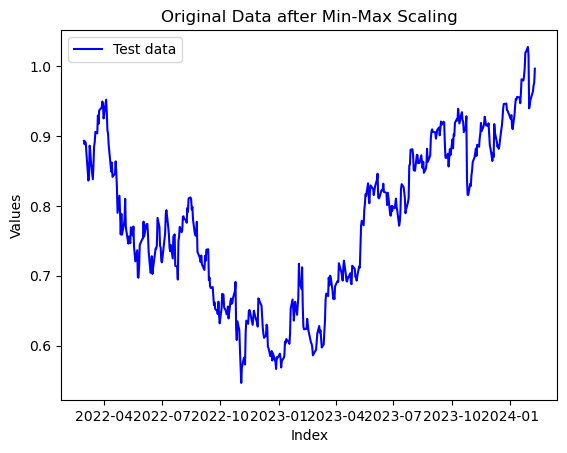

In [ ]:
# plot of what our test data looks like
plt.plot(df_test.index, test, color='blue', label='Test data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Original Data after Min-Max Scaling')
plt.legend()
plt.show()

In [ ]:
# getting X train and y train values
X_train, y_train = prepare_data(train)

#### Train Model

In [ ]:
# building a Sequential neural network model with two layers of SimpleRNN cells, followed by dropout layers, and a single output dense layer,
# compiled with the RMSprop optimizer and mean squared error loss
model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_82 (SimpleRNN)       │ (None, 60, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_83 (SimpleRNN)       │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting our model on the training data
history = model.fit(X_train, y_train, epochs = 35, batch_size = 40)

Epoch 1/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3501
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0084
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0014
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0010
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.0192e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.1525e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.1808e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.2506e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.4829e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.6593e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.7512e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.8441e-04
Epoch 15/35

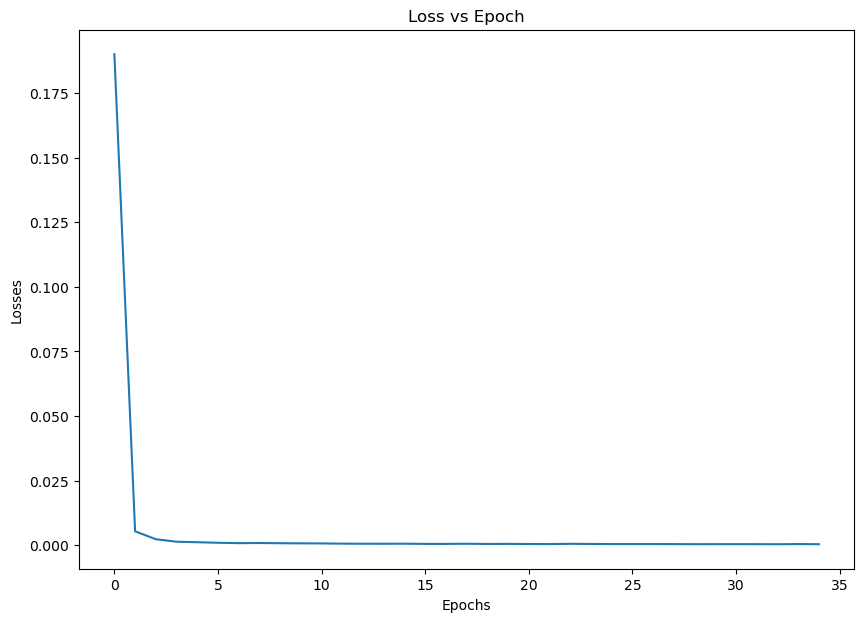

In [ ]:
# plotting loss vs epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch")
plt.show()

#### Predict and Evaluate Results

In [ ]:
# predicting the train data
y_predicted = model.predict(X_train)  # predictions
y_predicted = sc.inverse_transform(y_predicted) # scaling back from 0-1 to original

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# reverse the scaling
y_train = sc.inverse_transform(y_train) # scaling back from 0-1 to original

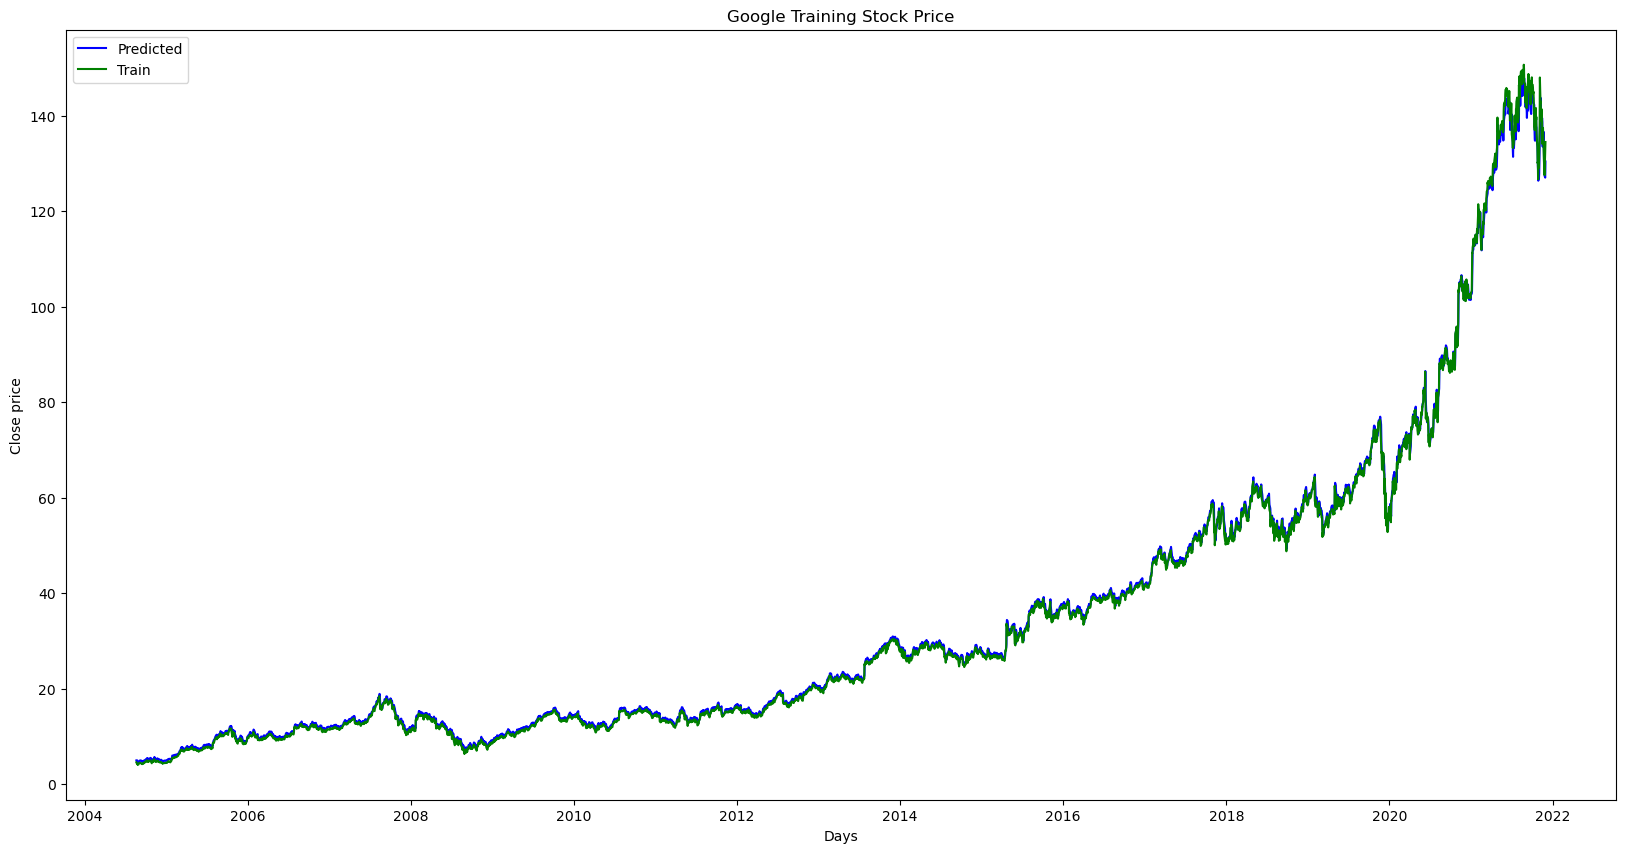

In [ ]:
# plotting the predicted results
plt.figure(figsize = (20,10))
plt.plot(df_train.index[:len(y_predicted)], y_predicted, color = "b", label = "Predicted" )
plt.plot(df_train.index[:len(y_train)], y_train, color = "g", label = "Train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Google Training Stock Price")
plt.legend()
plt.show()

In [ ]:
# getting X test and y test values
X_test, y_test = prepare_data(test)

In [ ]:
# predicting our test data, and transforming it back by reversing the scaling
y_test_predicted = model.predict(X_test)
y_test_predicted = sc.inverse_transform(y_test_predicted)
y_test = sc.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


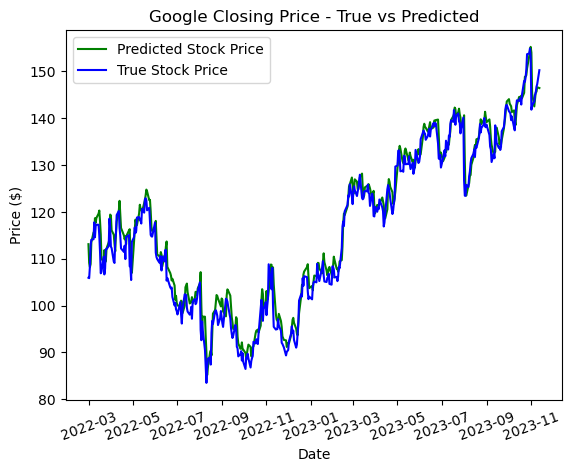

In [ ]:
# plotting the test results
plt.figure()
plt.plot(df_test.index[:len(y_test_predicted)], y_test_predicted, label = "Predicted Stock Price", color= "green")
plt.plot(df_test.index[:len(y_test)], y_test, label = "True Stock Price", color="blue")
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.title("Google Closing Price - True vs Predicted")
plt.xticks(rotation=20)
plt.legend()
plt.show()

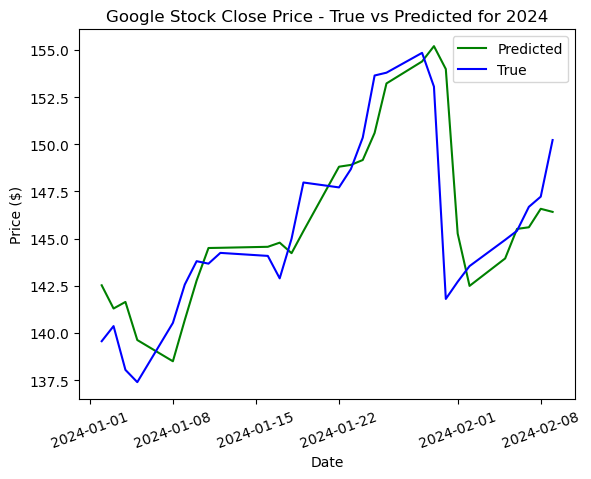

In [ ]:
# plotting test results for 2024
plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_test.index[-28:], y_test_predicted[-28:], 'green', label='Predicted')
plt.plot(df_test.index[-28:], y_test[-28:], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_test_predicted)

In [ ]:
mae = mean_absolute_error(y_test, y_test_predicted)

In [ ]:
rmse = math.sqrt(mse)

In [ ]:
print(mse, mae, rmse)

8.96520258397055 2.271911193254015 2.9941948139642736


## LSTM

### Visualize Data

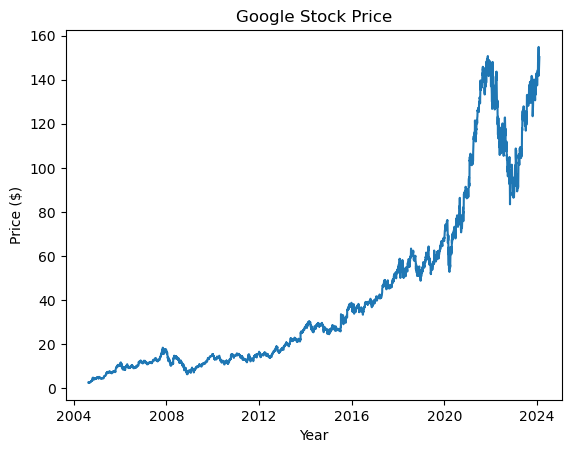

In [ ]:
dataset = pd.read_csv('GOOG.csv')
dataset = dataset[['Date', 'Close']]

# Set the Date as the index
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
plt.plot(dataset['Close'])
plt.title('Google Stock Price')
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.show()

### Prepare Data

In [ ]:
closing_price = dataset['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_closing_price = scaler.fit_transform(closing_price)

dataset['Scaled_Close'] = scaled_closing_price
dataset.head()

,Close,Scaled_Close
Date,,
2004-08-20,2.697639,0.001357
2004-08-23,2.724787,0.001535
2004-08-24,2.611960,0.000795
2004-08-25,2.640104,0.000979
2004-08-26,2.687676,0.001292


In [ ]:
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train = dataset.iloc[:train_size, :]
test = dataset.iloc[train_size:, :]

print(len(train), len(test))
print(train.head())
print(test.head())

4411 491
               Close  Scaled_Close
Date                              
2004-08-20  2.697639      0.001357
2004-08-23  2.724787      0.001535
2004-08-24  2.611960      0.000795
2004-08-25  2.640104      0.000979
2004-08-26  2.687676      0.001292
                 Close  Scaled_Close
Date                                
2022-02-28  134.891006      0.869057
2022-03-01  134.167999      0.864312
2022-03-02  134.751495      0.868142
2022-03-03  134.307999      0.865231
2022-03-04  132.121994      0.850882


In [ ]:
# convert dataset to create a sequence of look_back elements mapped to one output
def create_dataset(dataset, look_back=1):
  dataX = []
  dataY = []
  dates = dataset.index

  for i in range(len(dates) - look_back):
    dataX.append(dataset.loc[dates[i:(i + look_back)], 'Scaled_Close'].values)
    dataY.append(dataset.loc[dates[i + look_back], 'Scaled_Close'])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 50
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Train Model

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))

model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### Fit Model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
137/137 - 15s - 107ms/step - loss: 0.0019
Epoch 2/50
137/137 - 7s - 53ms/step - loss: 1.8654e-04
Epoch 3/50
137/137 - 9s - 65ms/step - loss: 1.9699e-04
Epoch 4/50
137/137 - 5s - 35ms/step - loss: 1.8221e-04
Epoch 5/50
137/137 - 5s - 35ms/step - loss: 1.5824e-04
Epoch 6/50
137/137 - 5s - 33ms/step - loss: 1.5007e-04
Epoch 7/50
137/137 - 4s - 33ms/step - loss: 1.4663e-04
Epoch 8/50
137/137 - 5s - 34ms/step - loss: 1.4176e-04
Epoch 9/50
137/137 - 4s - 33ms/step - loss: 1.3663e-04
Epoch 10/50
137/137 - 4s - 32ms/step - loss: 1.3109e-04
Epoch 11/50
137/137 - 5s - 34ms/step - loss: 1.2562e-04
Epoch 12/50
137/137 - 4s - 32ms/step - loss: 1.2071e-04
Epoch 13/50
137/137 - 5s - 33ms/step - loss: 1.1625e-04
Epoch 14/50
137/137 - 4s - 33ms/step - loss: 1.1180e-04
Epoch 15/50
137/137 - 5s - 33ms/step - loss: 1.0700e-04
Epoch 16/50
137/137 - 4s - 33ms/step - loss: 1.0163e-04
Epoch 17/50
137/137 - 4s - 32ms/step - loss: 9.5678e-05
Epoch 18/50
137/137 - 5s - 35ms/step - loss: 8.9312e-05
Epo

### Evaluate Results

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

In [ ]:
train_predict_inverse = scaler.inverse_transform(train_predict)
y_train_inverse = scaler.inverse_transform(y_train_reshaped)
test_predict_inverse = scaler.inverse_transform(test_predict)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)

y_train_flattened = np.array(y_train_inverse).flatten()
y_test_flattened = np.array(y_test_inverse).flatten()
train_predict_flattened = np.array(train_predict_inverse).flatten()
test_predict_flattened = np.array(test_predict_inverse).flatten()

In [ ]:
train_mse = mean_squared_error(y_train_flattened, train_predict_flattened)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_flattened, train_predict_flattened)

test_mse = mean_squared_error(y_test_flattened, test_predict_flattened)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_flattened, test_predict_flattened)

In [ ]:
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train MAE: {train_mae}')

print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')

Train MSE: 0.6764568601476129
Train RMSE: 0.8224699752256084
Train MAE: 0.49883055980080754
Test MSE: 5.987569903768192
Test RMSE: 2.4469511445405265
Test MAE: 1.8200074967292907


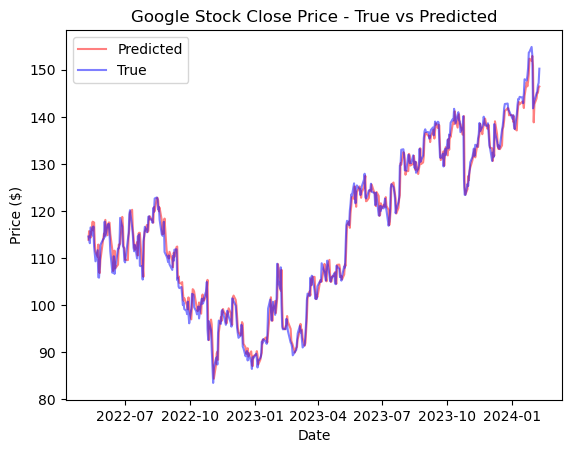

In [ ]:
dates = test.index[look_back:]
plt.plot(dates, test_predict_flattened, color = "r", alpha=0.5, label = "Predicted")
plt.plot(dates, y_test_flattened, color = "b", alpha=0.5, label = "True")
plt.title('Google Stock Close Price - True vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

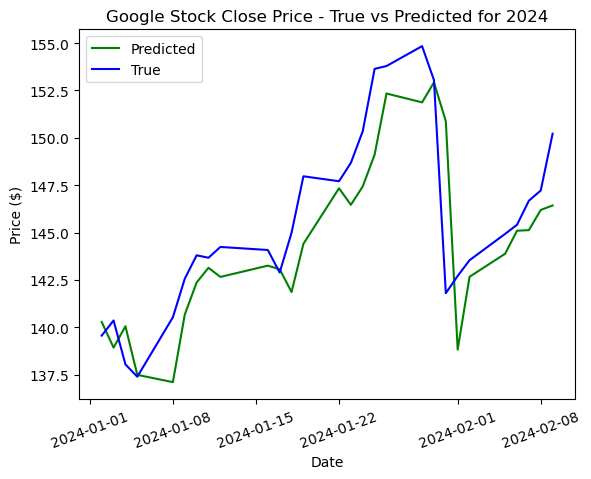

In [ ]:
df_predicted = pd.DataFrame(data={'Date': dates, 'Close': test_predict_flattened})
df_predicted.set_index('Date', inplace=True)

plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_predicted[df_predicted.index.year >= 2024]['Close'], 'green', label='Predicted')
plt.plot(dataset[dataset.index.year >= 2024]['Close'], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend(loc='upper left')
plt.show()